<a href="https://colab.research.google.com/github/keinam53/Deep_learning/blob/main/2_Keras/1_Model_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Model sekwencjny (Sequential Model):
1. [Wprowadzenie - pierwszy model](#a0)
2. [Funkcje aktywacji](#a1)
3. [Kompilacja modelu](#a2)
4. [Trenowanie modelu](#a3)
5. [Przykład - klasyfikacja binarna](#a4)
6. [Przykład - klasyfikacja wieloklasowa](#a5)
7. [Przykład - regresja](#a6)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
tf.__version__

'2.6.0'

### <a name='a0'></a>Wprowadzenie - pierwszy model
Model sekwencyjny to nic innego jak liniowy stos warstw.

In [2]:
#utworzenie instancji klasy Sequential
from tensorflow.keras.models import Sequential

model = Sequential()
print(model)

Podstawowym elementem składowym modelu są warstwy. Aby dodać najbardziej standardową warstwę - warstwę gęsto połączoną należy użyć warstwy **Dense**. Aby dodać warstwę do modelu należy użyć metody *.add()*

Wyświetlenie podsumowania modelu: metoda .summary()

In [3]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=4, input_shape=(10,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 44        
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


Dodanie kolejnej warstwy

In [4]:
model.add(Dense(units=2))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 44        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


### <a name='a1'></a>Funkcje aktywacji
Istotnym elemenem sieci neuronowych jest dobór odpowiednich funkcji aktywacji. Funkcje aktywacji jak sama nazwa wskazuje są odpowiedzialne za aktywowanie odpowiednich neuronów podczas procesu uczenia.

Jeżeli nie określimy podczas dodawania warstwy funkcji aktywacji, domyślnie stosowana jest liniowa funkcja aktywacji, tzn. $a(x)=x$

Warstwa z liniową funkcją aktywacji może uczyć się tylko liniowych przekształceń danych wejściowych. Dlatego stosuje się różne funkcje aktywacji aby rozwiazywać problemy nieliniowe.

[Keras: Funkcje aktywacji](https://keras.io/activations/)

In [5]:
from tensorflow.keras.activations import linear

random_data = sorted(np.random.randn(200))
data = pd.DataFrame({'data': random_data, 'linear': linear(random_data)})
data.head()

,data,linear
0,-2.571795,-2.571795
1,-2.105475,-2.105475
2,-1.981685,-1.981685
3,-1.862283,-1.862283
4,-1.803897,-1.803897


Text(0.5, 1.0, 'Funkcja aktywacji: Liniowa')

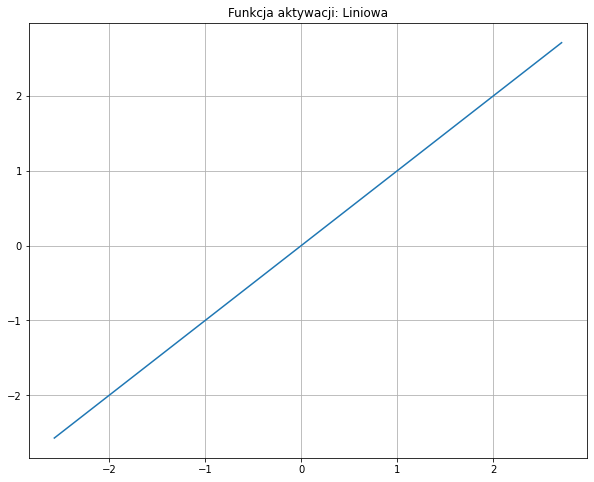

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(data['data'], data['linear'])
plt.grid()
plt.title('Funkcja aktywacji: Liniowa')

In [12]:
from tensorflow.keras.activations import sigmoid

data = pd.DataFrame({'data': random_data, 'sigmoid': sigmoid(random_data)})
data.head()

,data,sigmoid
0,-2.571795,0.070976
1,-2.105475,0.108566
2,-1.981685,0.121139
3,-1.862283,0.134437
4,-1.803897,0.141377


Text(0.5, 1.0, 'Funkcja aktywacji: Sigmoid')

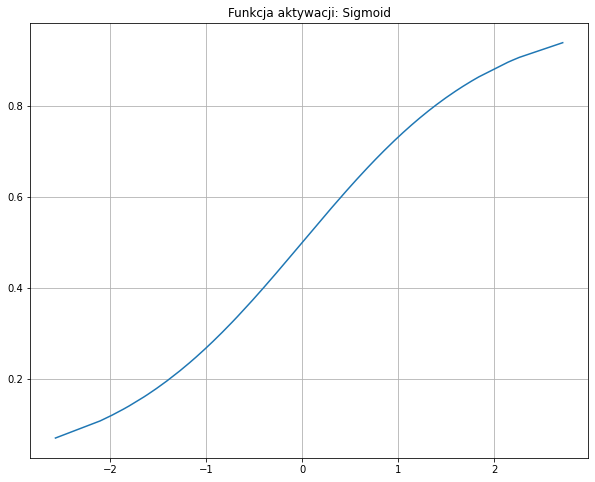

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(data['data'], data['sigmoid'])
plt.grid()
plt.title('Funkcja aktywacji: Sigmoid')

In [14]:
from tensorflow.keras.activations import relu

data = pd.DataFrame({'data': random_data, 'relu': relu(random_data)})
data.head()

,data,relu
0,-2.571795,0.0
1,-2.105475,0.0
2,-1.981685,0.0
3,-1.862283,0.0
4,-1.803897,0.0


Text(0.5, 1.0, 'Funkcja aktywacji: ReLu')

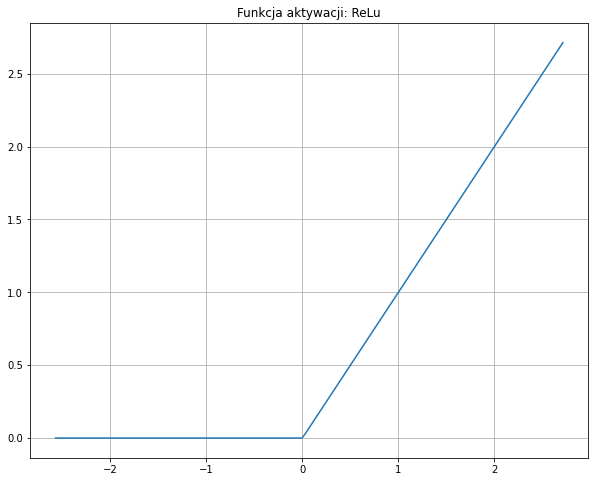

In [15]:
plt.figure(figsize=(10, 8))
plt.plot(data['data'], data['relu'])
plt.grid()
plt.title('Funkcja aktywacji: ReLu')

In [16]:
from tensorflow.keras.activations import tanh

data = pd.DataFrame({'data': random_data, 'tanh': tanh(random_data)})
data.head()

,data,tanh
0,-2.571795,-0.988394
1,-2.105475,-0.970769
2,-1.981685,-0.962711
3,-1.862283,-0.952889
4,-1.803897,-0.947208


Text(0.5, 1.0, 'Funkcja aktywacji: Tanh')

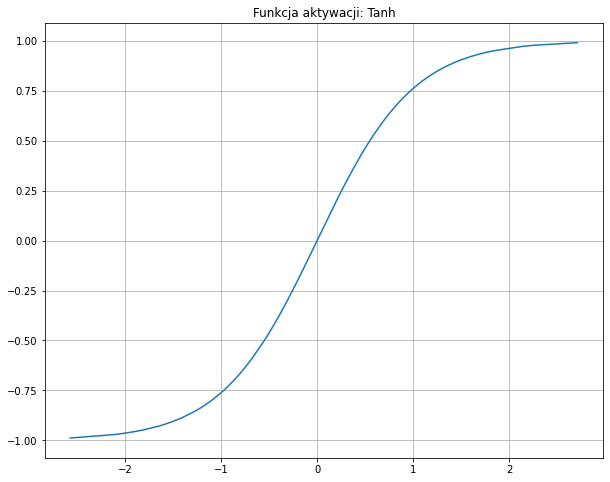

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(data['data'], data['tanh'])
plt.grid()
plt.title('Funkcja aktywacji: Tanh')

In [19]:
model = Sequential()
model.add(Dense(units=8, input_shape=(10,), activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


### <a name='a2'></a>Kompilacja modelu
Przed rozpoczęciem trenowania sieci należy odpowiednio skonfigurować proces uczenia. W tym kroku określamy:
* rodzaj optymalizatora ([Keras - Optymalizatory](https://keras.io/optimizers/)) 
* funkcję straty ([Keras - Funkcje Straty](https://keras.io/losses/))
* metryki, które będziemy obserwować podczas trenowania sieci ([Keras - Metryki](https://keras.io/metrics/))

In [20]:
#Klasyfikacja binarna
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Klasyfikacja wielkoklasow
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Regresja
model.compile(optimizer='rmsprop',
              loss='mse')

### <a name='a3'></a>Trenowanie modelu
Za dane wejściowe do modelu należy przekazać Numpy arrays:
* **epochs** - krotność przejścia danych przez sieć w procesie uczenia
* **batch_size** - rozmiar wsadu po którym następuje aktualizacja wag
* **validation_split** - część danych treningowych, które zostaną wykorzystane jako zbiór walidacyjny
* **validation_data** - (x_val, y_val) - dane wykorzystane do walidacji modelu

In [ ]:
# model.fit(data, labels, epochs=10, batch_size=32)
# model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2)
# model.fit(data, labels, epochs=10, batch_size=32, validation_data=(x_val, y_val))

### <a name='a4'></a> Przykład - klasyfikacja binarna

In [31]:
data = np.random.randn(1000, 150)
labels = np.random.randint(low=0, high=2, size=(1000, 1))

print(data.shape)
print(labels.shape)

(1000, 150)
(1000, 1)


In [33]:
labels[:5]

array([[0],
       [0],
       [1],
       [1],
       [0]])

In [36]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

model.fit(data, labels, epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.8164 - accuracy: 0.5040
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7283 - accuracy: 0.5540
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5880
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6420
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.6860
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7110
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.7350
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.7740
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.7920
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.8070
Epoch 11/20
32/32 [

In [37]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history = model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

In [38]:
metrics = history.history
metrics.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
test_data = np.random.randn(5, 150)
test_labels = np.random.randint(low=0, high=2, size=(5, 1))

In [41]:
model.predict(test_data)

array([[0.15053532],
       [0.06433588],
       [0.43285364],
       [0.20470834],
       [0.7487132 ]], dtype=float32)

In [47]:
predict = model.predict(test_data) 
y_pred = (model.predict(test_data) > 0.5).astype("int32")
y_pred

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

### <a name='a5'></a> Przykład - klasyfikacja wieloklasowa

In [58]:
data = np.random.random((1000, 150))
labels = np.random.randint(10, size=(1000, 1))

print(data.shape)
print(labels.shape)

(1000, 150)
(1000, 1)


In [59]:
labels[:10]

array([[8],
       [0],
       [2],
       [5],
       [9],
       [9],
       [2],
       [6],
       [8],
       [3]])

In [60]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels, num_classes=10)

In [62]:
labels[2]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [64]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

model.fit(data, labels, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

In [65]:
test_data = np.random.random((10, 150))

model.predict(test_data)

array([[0.11734989, 0.11419853, 0.1265586 , 0.13978374, 0.06626949,
        0.05326017, 0.15426704, 0.06887816, 0.10488389, 0.05455047],
       [0.1555085 , 0.09843507, 0.03283737, 0.05430854, 0.07759918,
        0.14067025, 0.15066281, 0.08985428, 0.11788688, 0.08223712],
       [0.08985587, 0.0739902 , 0.10559099, 0.22577646, 0.06904604,
        0.07818633, 0.09672291, 0.09859835, 0.09558969, 0.06664318],
       [0.08475208, 0.10098455, 0.05105212, 0.03712294, 0.11720612,
        0.10155641, 0.08751846, 0.09466086, 0.16285467, 0.16229182],
       [0.14725897, 0.06764418, 0.11110202, 0.0987138 , 0.08289259,
        0.14711861, 0.15878087, 0.06380325, 0.06934097, 0.05334474],
       [0.08272806, 0.1668859 , 0.06796853, 0.11157883, 0.07267197,
        0.06960492, 0.08752565, 0.06687541, 0.15551859, 0.11864214],
       [0.17775525, 0.17828064, 0.03199613, 0.04446537, 0.07237136,
        0.12404355, 0.08700669, 0.02929363, 0.1617533 , 0.09303413],
       [0.09602901, 0.11993983, 0.0819194

In [67]:
predict_x=model.predict(test_data) 
y_pred=np.argmax(predict_x,axis=-1)
y_pred

array([6, 0, 3, 8, 6, 1, 1, 8, 9, 8])

### <a name='a6'></a> Przykład - regresja

In [68]:
data = np.random.random((1000, 150))
labels = 50 * np.random.random(1000)

labels[:10]

array([4.92828620e+01, 1.24290810e+01, 4.53931568e-02, 4.95894275e+00,
       5.35892384e+00, 7.17187654e+00, 9.79463305e+00, 2.13635903e+01,
       2.82276078e+01, 4.42378734e+01])

In [69]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop',
              loss='mae',
              metrics=['mse'])

model.fit(data, labels, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

In [70]:
test_data = np.random.random((10, 150))
model.predict(test_data)

array([[20.716125],
       [21.19965 ],
       [21.384739],
       [27.765696],
       [26.684105],
       [23.36717 ],
       [22.73888 ],
       [23.43208 ],
       [23.553072],
       [23.02868 ]], dtype=float32)